## Preprocessing and EDA

## Importing Libraries 

In [1]:
# basic functionalities
import os
import sys
import datetime
import itertools
import math

# data transforamtion and manipulation
import pandas as pd
import numpy as np
from math import sqrt

# prevent crazy long numpy prints
np.set_printoptions(precision=4, suppress=True)

# prevent crazy long pandas prints
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot styling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# set params
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

# statistical modeling libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# ML basic library
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

#Img:
from IPython.display import Image


/var/folders/yp/wh4rvlfs5r5b3n1mdqkp6ypm0000gn/T/ipykernel_1681/1446117332.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Importing data


In [2]:
datapath_file = './105_days.parquet'
df = pd.read_parquet(datapath_file)


In [3]:
df.head()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
0,2023-01-01 00:00:00,66116.00000,67088.31250,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000
1,2023-01-01 00:00:01,66561.00000,68342.31250,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000
2,2023-01-01 00:00:02,66107.00000,67583.31250,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000
3,2023-01-01 00:00:03,66309.00000,67101.31250,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000
4,2023-01-01 00:00:04,66309.00000,65259.31250,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000


In [4]:
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [5]:
df['ActivePower'] /= 1000
df['ReactivePower'] /= 1000
df['wahing_machine'] /= 1000
df['dishwasher'] /= 1000
df['oven'] /= 1000


# Data Preprocessing and Exploratory Data Analysis (EDA)

## __Converting to datetime format and sort:__

In [6]:
# convert:
df['DateTime'] = pd.to_datetime(df['DateTime'])
# sort:
df = df.sort_values(by=['DateTime'], axis=0, ascending=True)
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [7]:
df.shape


(9072000, 16)

In [8]:
df.head()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
0,2023-01-01 00:00:00,66.11600,67.08831,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000
1,2023-01-01 00:00:01,66.56100,68.34231,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000
2,2023-01-01 00:00:02,66.10700,67.58331,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000
3,2023-01-01 00:00:03,66.30900,67.10131,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000
4,2023-01-01 00:00:04,66.30900,65.25931,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000


In [9]:
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [10]:
df.describe()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
count,9072000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000
mean,2023-02-22 11:59:59.499976448,259.92478,72.56988,234.48259,839.26380,-4.40645,-1209.78415,26.10631,-84.17444,-13.41147,-21.86635,-7.03521,-11.00812,13.72150,35.22077,12.01732
min,2023-01-01 00:00:00,0.00000,-763.30775,226.00000,215.00000,-4074.00000,-28129.00000,-695.00000,-1070.00000,-223.00000,-264.00000,-150.00000,-151.00000,0.00000,0.00000,0.00000
25%,2023-01-27 05:59:59.750000128,72.84600,55.77600,233.00000,305.00000,-91.00000,-965.00000,15.00000,-100.00000,-17.00000,-26.00000,-10.00000,-16.00000,0.00000,0.00000,0.00000
50%,2023-02-22 11:59:59.500000,132.47700,66.45431,234.00000,560.00000,10.00000,-611.00000,21.00000,-62.00000,-14.00000,-19.00000,-6.00000,-10.00000,0.00000,0.00000,0.00000
75%,2023-03-20 17:59:59.249999872,208.37100,79.76900,236.00000,751.00000,46.00000,-331.00000,36.00000,-48.00000,-9.00000,-13.00000,-3.00000,-6.00000,0.00000,0.00000,0.00000
max,2023-04-15 23:59:59,5962.83200,1590.07625,240.00000,18942.00000,1208.00000,81.00000,487.00000,416.00000,121.00000,183.00000,94.00000,70.00000,1924.37800,2026.09100,1426.67300
std,NaN,460.49216,42.52092,1.48292,1167.00240,157.41971,2169.44597,31.10213,60.16534,12.56519,16.32026,7.48746,8.79185,140.09371,257.92428,125.18398


## __Removal duplicates__:

In [11]:
df.drop_duplicates(subset='DateTime', keep='last', inplace=True)


In [12]:
print('Time period start: {}\nTime period end: {}'.format(df.DateTime.min(),df.DateTime.max()))


Time period start: 2023-01-01 00:00:00
Time period end: 2023-04-15 23:59:59


## __Setting index as the datetime column for easier manipulations:__

In [13]:
df = df.set_index('DateTime')
print(f'df.index.freq is: {df.index.freq}')


df.index.freq is: None


__Note:__
- datetime index's frequency is None => there are some missing data points somewhere (otherwise Python could deduce it) => remove missing 

## __Find and Fill Missing datetime Instances__

In [14]:
# ideal range: without missing data
date_range = pd.date_range(start=min(df.index), end=max(df.index), freq='S')


In [15]:
min(df.index), max(df.index),


(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-04-15 23:59:59'))

In [16]:
print(f'The difference in length between the ideal date range and our dataset is: {(len(date_range)-len(df))}:')


The difference in length between the ideal date range and our dataset is: 0:


In [17]:
print("missing data in:", date_range.difference(df.index))


missing data in: DatetimeIndex([], dtype='datetime64[ns]', freq='s')


In [18]:
#Reindex the dataset and then fill data:

#Create null values in missing data:
df = df.reindex(date_range)

#Filling  missing  with linear interpolation between existing data points
for col in df.columns:
    df[col].interpolate(method='linear', inplace=True)

# now we have a neatly continuous datetime index
print(f'The df.index.freq is now: {df.index.freq}, => we no have missing instances')


The df.index.freq is now: <Second>, => we no have missing instances


In [19]:
from scipy.fft import fft

# Assuming your original dataset is named 'original_data' with a datetime index and columns like 'Voltage', 'Current', etc.

# Define a function to calculate features for each 30-second interval
def calculate_features(interval_data):
    features = {
        'Voltage': interval_data['Voltage'].mean(),
        'Current': interval_data['Current'].mean(),
        'ActivePower': interval_data['ActivePower'].mean(),
        'ReactivePower': interval_data['ReactivePower'].mean(),
        'harmonic1_Real': interval_data['harmonic1_Real'].mean(),
        'harmonic1_Imaginary': interval_data['harmonic1_Imaginary'].mean(),
        'harmonic3_Real': interval_data['harmonic3_Real'].mean(),
        'harmonic3_Imaginary': interval_data['harmonic3_Imaginary'].mean(),
        'harmonic5_Real': interval_data['harmonic5_Real'].mean(),
        'harmonic5_Imaginary': interval_data['harmonic5_Imaginary'].mean(),
        'harmonic7_Real': interval_data['harmonic7_Real'].mean(),
        'harmonic7_Imaginary': interval_data['harmonic7_Imaginary'].mean(),
        'wahing_machine': interval_data['wahing_machine'].mean(),
        'dishwasher': interval_data['dishwasher'].mean(),
        'oven': interval_data['oven'].mean(),
        'Dominant_Frequency': get_dominant_frequency(interval_data['Current'].values),  # Add frequency feature
        'Dominant_Period': 1 / get_dominant_frequency(interval_data['Current'].values),  # Add period feature
        'Std_Current': interval_data['Current'].std(),
        'Total_Energy': np.sum(interval_data['Current'].values**2),
        'maxActPower': interval_data['ActivePower'].max(),
        'maxReactPower': interval_data['ReactivePower'].max(),
        'maxCurrent': interval_data['Current'].max(),
        'maxHarmonic1_Real': interval_data['harmonic1_Real'].max(),
        'maxHarmonic1_Imaginary': interval_data['harmonic1_Imaginary'].max(),
        'maxHarmonic3_Real': interval_data['harmonic3_Real'].max(),
        'maxHarmonic3_Imaginary': interval_data['harmonic3_Imaginary'].max(),
        'maxHarmonic5_Real': interval_data['harmonic5_Real'].max(),
        'maxHarmonic5_Imaginary': interval_data['harmonic5_Imaginary'].max(),
        'maxHarmonic7_Real': interval_data['harmonic7_Real'].max(),
        'maxHarmonic7_Imaginary': interval_data['harmonic7_Imaginary'].max(),
        # Add other feature calculations as needed
    }
    return pd.Series(features)

# Function to get dominant frequency using Fourier Transform
def get_dominant_frequency(signal):
    N = len(signal)
    frequencies = np.fft.fftfreq(N)
    fft_values = fft(signal)
    dominant_frequency = frequencies[np.argmax(np.abs(fft_values[1:N//2]))]
    return dominant_frequency

# Group data into 10-second intervals
df = df.resample('10S')

# Apply the feature calculation function to each interval
df = df.apply(calculate_features)

In [20]:
df.head()


,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary
2023-01-01 00:00:00,236.30000,280.40000,66.24720,66.88061,14.60000,-301.00000,16.30000,-54.90000,-15.90000,-21.90000,-9.30000,-12.60000,0.00000,0.00000,0.00000,0.30000,3.33333,0.96609,786250.00000,66.56100,68.34231,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-21.00000,-3.00000,-7.00000
2023-01-01 00:00:10,236.00000,280.40000,66.16030,66.94031,14.60000,-301.20000,16.20000,-55.00000,-15.80000,-22.30000,-8.30000,-12.30000,0.00000,0.00000,0.00000,0.30000,3.33333,1.34990,786258.00000,66.75600,68.37631,283.00000,17.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-2.00000,-8.00000
2023-01-01 00:00:20,236.00000,280.00000,66.07000,66.11611,14.60000,-301.10000,16.50000,-54.90000,-15.30000,-22.20000,-4.40000,-12.90000,0.00000,0.00000,0.00000,0.00000,inf,3.01846,784082.00000,67.25400,67.78731,285.00000,17.00000,-295.00000,17.00000,-53.00000,-15.00000,-22.00000,-2.00000,-8.00000
2023-01-01 00:00:30,236.00000,280.60000,66.21290,66.86121,12.50000,-301.50000,15.80000,-55.60000,-15.80000,-22.20000,-6.10000,-13.30000,0.00000,0.00000,0.00000,0.10000,10.00000,2.27058,787410.00000,66.78700,67.85331,283.00000,15.00000,-297.00000,16.00000,-54.00000,-15.00000,-21.00000,-2.00000,-8.00000
2023-01-01 00:00:40,236.00000,282.00000,66.53610,67.26651,10.80000,-302.50000,15.30000,-55.60000,-16.60000,-21.70000,-10.80000,-14.20000,0.00000,0.00000,0.00000,0.10000,10.00000,3.01846,795322.00000,67.72200,68.42131,287.00000,14.00000,-299.00000,16.00000,-54.00000,-16.00000,-19.00000,-6.00000,-6.00000


In [21]:
df.shape


(907200, 30)

## Extracting Time Features

- We split datetime into its different __features__ => to find patterns for different groups.

In [22]:
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['weekofyear'] = df.index.dayofyear//7
df['dayofmonth'] = df.index.day # Day of Month
df['date'] = df.index.date

# let's add the season number
df['season'] = df['month'].apply(lambda month_number: (month_number%12 + 3)//3)


In [23]:
df.head()


,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-01-01 00:00:00,236.30000,280.40000,66.24720,66.88061,14.60000,-301.00000,16.30000,-54.90000,-15.90000,-21.90000,-9.30000,-12.60000,0.00000,0.00000,0.00000,0.30000,3.33333,0.96609,786250.00000,66.56100,68.34231,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-21.00000,-3.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:10,236.00000,280.40000,66.16030,66.94031,14.60000,-301.20000,16.20000,-55.00000,-15.80000,-22.30000,-8.30000,-12.30000,0.00000,0.00000,0.00000,0.30000,3.33333,1.34990,786258.00000,66.75600,68.37631,283.00000,17.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-2.00000,-8.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:20,236.00000,280.00000,66.07000,66.11611,14.60000,-301.10000,16.50000,-54.90000,-15.30000,-22.20000,-4.40000,-12.90000,0.00000,0.00000,0.00000,0.00000,inf,3.01846,784082.00000,67.25400,67.78731,285.00000,17.00000,-295.00000,17.00000,-53.00000,-15.00000,-22.00000,-2.00000,-8.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:30,236.00000,280.60000,66.21290,66.86121,12.50000,-301.50000,15.80000,-55.60000,-15.80000,-22.20000,-6.10000,-13.30000,0.00000,0.00000,0.00000,0.10000,10.00000,2.27058,787410.00000,66.78700,67.85331,283.00000,15.00000,-297.00000,16.00000,-54.00000,-15.00000,-21.00000,-2.00000,-8.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:40,236.00000,282.00000,66.53610,67.26651,10.80000,-302.50000,15.30000,-55.60000,-16.60000,-21.70000,-10.80000,-14.20000,0.00000,0.00000,0.00000,0.10000,10.00000,3.01846,795322.00000,67.72200,68.42131,287.00000,14.00000,-299.00000,16.00000,-54.00000,-16.00000,-19.00000,-6.00000,-6.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1


In [24]:
df.tail()


,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-04-15 23:59:10,236.00000,597.20000,139.49170,140.86359,-126.50000,-643.20000,17.00000,-41.50000,-17.20000,-10.40000,-7.90000,-3.60000,0.00000,0.00000,0.00000,0.00000,inf,2.57337,3566538.00000,140.46400,142.25239,601.00000,-124.00000,-639.00000,18.00000,-41.00000,-16.00000,-9.00000,-2.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:20,236.00000,599.20000,139.98560,140.72439,-125.20000,-645.70000,17.90000,-42.60000,-16.60000,-11.30000,-7.70000,-2.40000,0.00000,0.00000,0.00000,0.00000,inf,1.75119,3590434.00000,140.69000,142.54439,601.00000,-122.00000,-639.00000,19.00000,-41.00000,-16.00000,-10.00000,-3.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:30,235.30000,595.00000,138.75130,139.34819,-120.30000,-641.00000,17.90000,-40.90000,-16.10000,-10.90000,-5.30000,-4.00000,0.00000,0.00000,0.00000,0.00000,inf,3.12694,3540338.00000,140.32200,141.87139,601.00000,-117.00000,-636.00000,19.00000,-40.00000,-16.00000,-10.00000,-2.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:40,235.10000,593.60000,138.20100,140.07859,-123.00000,-639.40000,17.40000,-41.10000,-16.20000,-10.80000,-6.20000,-3.90000,0.00000,0.00000,0.00000,0.30000,3.33333,1.89737,3523642.00000,138.96700,141.68239,597.00000,-121.00000,-635.00000,18.00000,-40.00000,-16.00000,-10.00000,-2.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:50,235.20000,597.00000,139.07830,140.01729,-123.60000,-642.50000,18.00000,-42.10000,-16.50000,-11.10000,-7.60000,-3.70000,0.00000,0.00000,0.00000,0.30000,3.33333,2.82843,3564162.00000,141.10800,142.25639,603.00000,-120.00000,-636.00000,19.00000,-40.00000,-16.00000,-10.00000,-2.00000,0.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt


In [26]:
gr_hour_season = df.groupby(['hour', 'season']).agg({'ActivePower':'median'})
gr_hour_season.head()


ActivePower
hour season             
0    1         110.21335
     2         113.99940
1    1          66.17270
     2          66.12770
2    1          65.19680

In [27]:
gr_dayofweek_season = df.groupby(['dayofweek', 'season'], as_index=False).agg({'ActivePower':'median'})
gr_dayofweek_season.head()


,dayofweek,season,ActivePower
0,0,1,132.09610
1,0,2,129.18465
2,1,1,135.13150
3,1,2,132.46835
4,2,1,132.25405


In [28]:
gr_dayofweek_season['dayofweek_name'] = gr_dayofweek_season.dayofweek.map({ 0:'lunedi',
                                                                            1:'martedi',
                                                                            2:'mercoledi',
                                                                            3:'giovedi',
                                                                            4:'venerdi',
                                                                            5:'sabato',
                                                                            6:'domenica',
                                                                         })


In [29]:
gr_dayofweek_season.head()


,dayofweek,season,ActivePower,dayofweek_name
0,0,1,132.09610,lunedi
1,0,2,129.18465,lunedi
2,1,1,135.13150,martedi
3,1,2,132.46835,martedi
4,2,1,132.25405,mercoledi


## Unbalanced data

In [30]:
y_wm = (df['wahing_machine']>0).astype(int)
y_dw = (df['dishwasher']>0).astype(int)
y_ow = (df['oven']>0).astype(int)


In [31]:
drop_cols = ['wahing_machine', 'dishwasher', 'oven', 'date']
X =  df.drop(drop_cols, axis=1)


In [32]:
X.dtypes


Voltage                   float64
Current                   float64
ActivePower               float64
ReactivePower             float64
harmonic1_Real            float64
harmonic1_Imaginary       float64
harmonic3_Real            float64
harmonic3_Imaginary       float64
harmonic5_Real            float64
harmonic5_Imaginary       float64
harmonic7_Real            float64
harmonic7_Imaginary       float64
Dominant_Frequency        float64
Dominant_Period           float64
Std_Current               float64
Total_Energy              float64
maxActPower               float64
maxReactPower             float64
maxCurrent                float64
maxHarmonic1_Real         float64
maxHarmonic1_Imaginary    float64
maxHarmonic3_Real         float64
maxHarmonic3_Imaginary    float64
maxHarmonic5_Real         float64
maxHarmonic5_Imaginary    float64
maxHarmonic7_Real         float64
maxHarmonic7_Imaginary    float64
dayofweek                   int32
dayofyear                   int32
year          

In [33]:
X.describe()


,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,season
count,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000,907200.00000
mean,234.48259,839.26380,259.92478,72.56988,-4.40645,-1209.78415,26.10631,-84.17444,-13.41147,-21.86635,-7.03521,-11.00812,0.11107,inf,28.35825,20662581.73447,272.44136,76.32334,879.10380,2.73631,-1162.53370,28.69456,-80.52733,-11.73667,-20.31218,-1.72697,-5.87809,3.00000,53.00000,2023.00000,2.28571,1.14286,11.50000,3.00000,7.14286,14.45714,1.43810
std,1.45023,1144.36204,456.38206,41.76930,153.43030,2149.93656,30.07127,59.51231,11.87333,16.11642,6.22006,7.96492,0.12136,NaN,239.46168,81238827.01792,480.41336,48.58311,1243.83999,150.52436,2093.39763,29.47976,57.55474,10.06029,15.80135,4.99117,7.56070,2.00000,30.30953,0.00000,1.03936,0.34993,6.92219,2.00000,4.33464,8.64102,0.49615
min,228.50000,218.40000,51.04040,-59.34325,-1936.00000,-27648.10000,-642.80000,-856.00000,-196.70000,-191.60000,-90.40000,-93.00000,0.00000,3.33333,0.00000,477066.00000,51.69400,1.61191,221.00000,-1924.00000,-27507.00000,-613.00000,-829.00000,-181.00000,-187.00000,-83.00000,-85.00000,0.00000,1.00000,2023.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
25%,233.50000,307.60000,73.48890,55.90840,-91.20000,-971.70000,14.80000,-100.00000,-17.10000,-25.90000,-8.60000,-13.80000,0.00000,5.00000,2.14994,946887.00000,75.07600,57.77412,314.00000,-86.00000,-906.00000,16.00000,-96.00000,-16.00000,-24.00000,-3.00000,-8.00000,1.00000,27.00000,2023.00000,1.00000,1.00000,5.75000,1.00000,3.00000,7.00000,1.00000
50%,234.40000,559.80000,132.68610,66.50231,10.10000,-611.00000,20.90000,-62.70000,-14.30000,-19.40000,-6.50000,-10.70000,0.10000,10.00000,2.74064,3136040.00000,134.61000,67.90731,566.00000,14.00000,-603.00000,22.00000,-59.00000,-13.00000,-18.00000,-1.00000,-6.00000,3.00000,53.00000,2023.00000,2.00000,1.00000,11.50000,3.00000,7.00000,14.00000,1.00000
75%,235.50000,754.80000,209.83595,79.98550,45.70000,-333.50000,35.50000,-48.20000,-9.00000,-13.30000,-4.30000,-5.50000,0.20000,NaN,3.79473,5709338.00000,223.22800,83.32631,772.00000,50.00000,-323.00000,38.00000,-46.00000,-8.00000,-12.00000,0.00000,0.00000,5.00000,79.00000,2023.00000,3.00000,1.00000,17.25000,5.00000,11.00000,22.00000,2.00000
max,239.60000,15146.10000,5862.92670,683.38146,759.50000,-236.10000,461.30000,217.90000,60.40000,133.60000,18.80000,45.40000,0.30000,inf,7121.85378,2294045413.00000,5962.83200,1590.07625,18942.00000,1208.00000,81.00000,487.00000,416.00000,121.00000,183.00000,94.00000,70.00000,6.00000,105.00000,2023.00000,4.00000,2.00000,23.00000,6.00000,15.00000,31.00000,2.00000


In [34]:
y_wm.head()

2023-01-01 00:00:00    0
2023-01-01 00:00:10    0
2023-01-01 00:00:20    0
2023-01-01 00:00:30    0
2023-01-01 00:00:40    0
Freq: 10s, Name: wahing_machine, dtype: int64

In [35]:
y_wm.value_counts()


wahing_machine
0    872826
1     34374
Name: count, dtype: int64

In [36]:
y_dw.value_counts()


dishwasher
0    882894
1     24306
Name: count, dtype: int64

In [37]:
y_ow.value_counts()


oven
0    895958
1     11242
Name: count, dtype: int64

In [38]:
y_wm_month = pd.concat([y_wm, df['month']], axis=1)

In [39]:
print(y_wm_month.groupby(['month', 'wahing_machine']).size().unstack(fill_value=0))

wahing_machine       0      1
month                        
1               256529  11311
2               235272   6648
3               257113  10727
4               123912   5688


In [40]:
y_dw_month = pd.concat([y_dw, df['month']], axis=1)

In [41]:
print(y_dw_month.groupby(['month', 'dishwasher']).size().unstack(fill_value=0))

dishwasher       0     1
month                   
1           261780  6060
2           234745  7175
3           260016  7824
4           126353  3247


In [42]:
y_ow_month = pd.concat([y_ow, df['month']], axis=1)

In [43]:
print(y_ow_month.groupby(['month', 'oven']).size().unstack(fill_value=0))

oven        0     1
month              
1      264300  3540
2      238818  3102
3      264783  3057
4      128057  1543


In [44]:
print(y_ow_month.groupby(['month', 'oven']).size().unstack(fill_value=0))

oven        0     1
month              
1      264300  3540
2      238818  3102
3      264783  3057
4      128057  1543


In [45]:
Y = pd.concat([y_wm, y_dw, y_ow], axis=1)


In [46]:
Y.head()


,wahing_machine,dishwasher,oven
2023-01-01 00:00:00,0,0,0
2023-01-01 00:00:10,0,0,0
2023-01-01 00:00:20,0,0,0
2023-01-01 00:00:30,0,0,0
2023-01-01 00:00:40,0,0,0


<Axes: xlabel='wahing_machine,dishwasher,oven'>

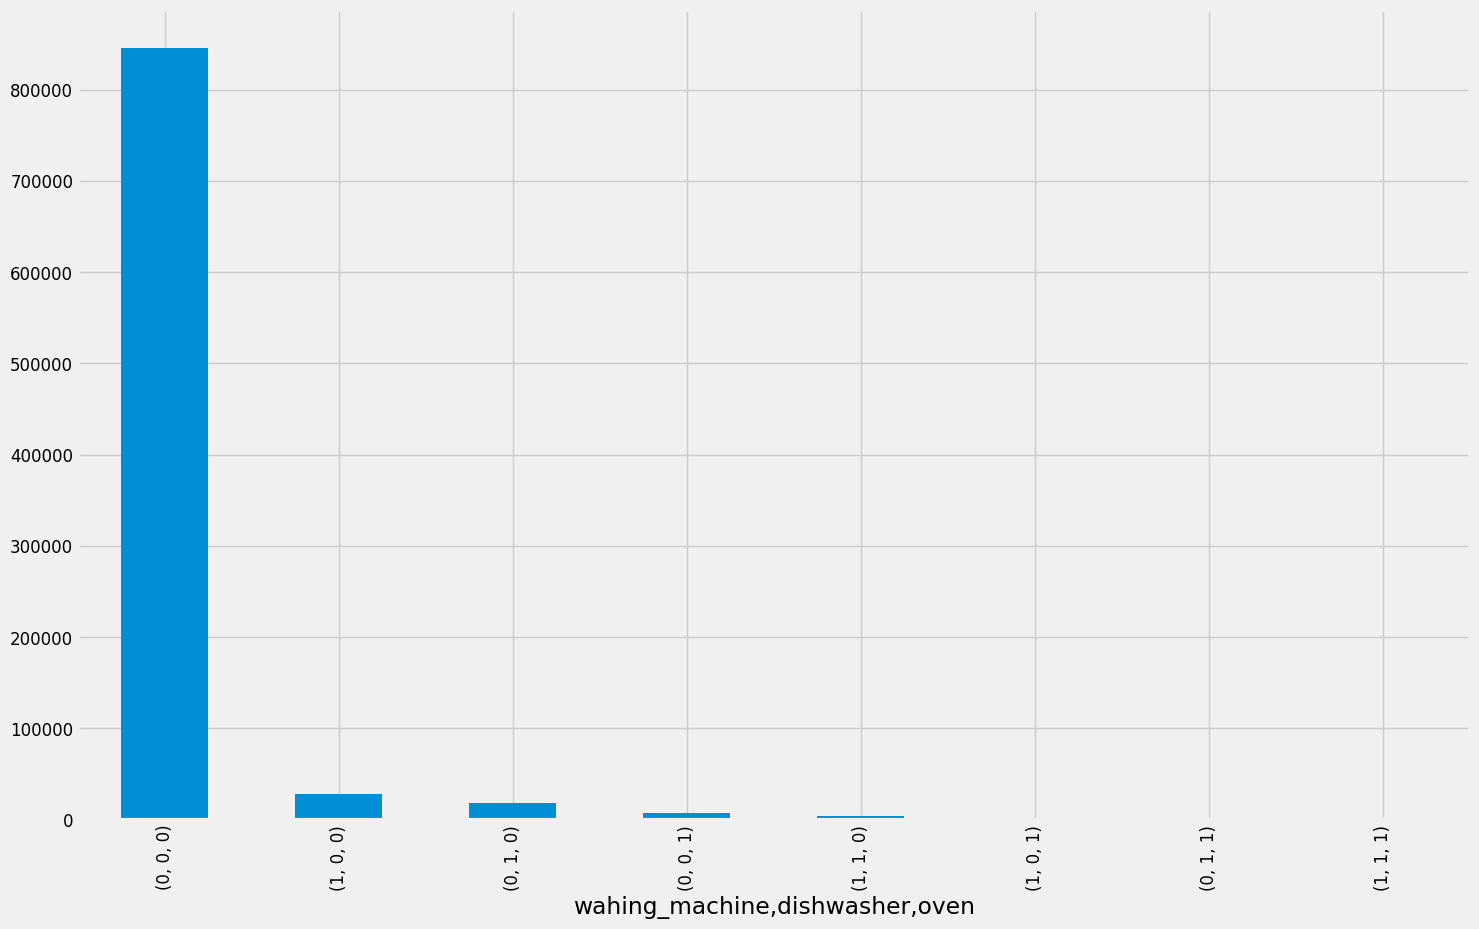

In [47]:
Y.value_counts().plot(kind='bar')


In [48]:
Y['label'] = Y[['wahing_machine','dishwasher','oven']].apply(lambda row: int(''.join(map(str, row)), 2), axis=1)


In [49]:
print(Y[Y['label']==4])


                     wahing_machine  dishwasher  oven  label
2023-01-02 18:04:20               1           0     0      4
2023-01-02 18:04:30               1           0     0      4
2023-01-02 18:04:40               1           0     0      4
2023-01-02 18:04:50               1           0     0      4
2023-01-02 18:05:00               1           0     0      4
...                             ...         ...   ...    ...
2023-04-15 08:35:50               1           0     0      4
2023-04-15 08:36:00               1           0     0      4
2023-04-15 08:36:10               1           0     0      4
2023-04-15 08:36:20               1           0     0      4
2023-04-15 08:36:30               1           0     0      4

[28358 rows x 4 columns]


In [50]:
Y['label_str'] = Y['label'].map({0:'AO',
                                1:'OW',
                                2:'DW',
                                3:'DW_OW',
                                4:'WM',
                                5:'WM_OW',
                                6:'WM_DW',
                                7:'WM_DW_OW',
                                })
Y['label_str']


2023-01-01 00:00:00    AO
2023-01-01 00:00:10    AO
2023-01-01 00:00:20    AO
2023-01-01 00:00:30    AO
2023-01-01 00:00:40    AO
                       ..
2023-04-15 23:59:10    AO
2023-04-15 23:59:20    AO
2023-04-15 23:59:30    AO
2023-04-15 23:59:40    AO
2023-04-15 23:59:50    AO
Freq: 10s, Name: label_str, Length: 907200, dtype: object

In [51]:
y_analysis = pd.concat([Y, df['ActivePower'], df['ReactivePower'], df['harmonic1_Real'], df['harmonic1_Imaginary'], df['harmonic3_Real'], df['harmonic3_Imaginary'], df['harmonic5_Real'], df['harmonic5_Imaginary'], df['harmonic7_Real'], df['harmonic7_Imaginary'], df['Voltage'], df['Current']], axis=1)

## Add a new features

### Instant Power

In [52]:
y_analysis['instant_power'] = y_analysis['ActivePower'] * y_analysis['ReactivePower']


### Apparent Power

In [53]:
y_analysis['ApparentPower'] = (y_analysis['ActivePower']**2 + y_analysis['ReactivePower']**2)**0.5

### Power Factor

In [54]:
y_analysis['PowerFactor'] = np.cos(np.arccos(y_analysis['ActivePower'] / y_analysis['ApparentPower']))

### Total Harmonic Distortion (THD)

In [55]:
harmonics_columns = ['harmonic1_Real', 'harmonic1_Imaginary', 'harmonic3_Real', 'harmonic3_Imaginary',
                     'harmonic5_Real', 'harmonic5_Imaginary', 'harmonic7_Real', 'harmonic7_Imaginary']

harmonics_square_sum = np.sum(y_analysis[harmonics_columns] ** 2, axis=1)
y_analysis['THD'] = np.sqrt(harmonics_square_sum) / y_analysis['ActivePower']

### Harmonic Distortion Index

In [56]:
y_analysis['HarmonicDistortionIndex'] = np.sum(np.sqrt(y_analysis[harmonics_columns] ** 2), axis=1)

### Power Fluctuation

In [57]:
y_analysis['Power Fluctuations'] = y_analysis['ActivePower'].diff() / y_analysis.index.to_series().diff().dt.total_seconds()

# Fill NaN values in the first row (resulting from the diff operation)
y_analysis['Power Fluctuations'].iloc[0] = 0.0


### Resistance

In [58]:
y_analysis['Resistance'] = y_analysis['Voltage'] / y_analysis['Current']

In [59]:
y_analysis.head()

,wahing_machine,dishwasher,oven,label,label_str,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,0,0,0,0,AO,66.24720,66.88061,14.60000,-301.00000,16.30000,-54.90000,-15.90000,-21.90000,-9.30000,-12.60000,236.30000,280.40000,4430.65331,94.13664,0.70373,4.65434,446.50000,0.00000,0.84272
2023-01-01 00:00:10,0,0,0,0,AO,66.16030,66.94031,14.60000,-301.20000,16.20000,-55.00000,-15.80000,-22.30000,-8.30000,-12.30000,236.00000,280.40000,4428.79116,94.11796,0.70295,4.66333,445.70000,-0.00869,0.84165
2023-01-01 00:00:20,0,0,0,0,AO,66.07000,66.11611,14.60000,-301.10000,16.50000,-54.90000,-15.30000,-22.20000,-4.40000,-12.90000,236.00000,280.00000,4368.29155,93.46970,0.70686,4.66686,441.90000,-0.00903,0.84286
2023-01-01 00:00:30,0,0,0,0,AO,66.21290,66.86121,12.50000,-301.50000,15.80000,-55.60000,-15.80000,-22.20000,-6.10000,-13.30000,236.00000,280.60000,4427.07478,94.09872,0.70365,4.66371,442.80000,0.01429,0.84105
2023-01-01 00:00:40,0,0,0,0,AO,66.53610,67.26651,10.80000,-302.50000,15.30000,-55.60000,-16.60000,-21.70000,-10.80000,-14.20000,236.00000,282.00000,4475.65140,94.61414,0.70324,4.65702,447.50000,0.03232,0.83688


In [60]:
# List of column names to drop
columns_to_drop = ['wahing_machine', 'dishwasher', 'oven', 'label', 'label_str']

# Dropping columns
x_analysis = y_analysis.drop(columns=columns_to_drop)

In [61]:
x_analysis.head()

,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,66.24720,66.88061,14.60000,-301.00000,16.30000,-54.90000,-15.90000,-21.90000,-9.30000,-12.60000,236.30000,280.40000,4430.65331,94.13664,0.70373,4.65434,446.50000,0.00000,0.84272
2023-01-01 00:00:10,66.16030,66.94031,14.60000,-301.20000,16.20000,-55.00000,-15.80000,-22.30000,-8.30000,-12.30000,236.00000,280.40000,4428.79116,94.11796,0.70295,4.66333,445.70000,-0.00869,0.84165
2023-01-01 00:00:20,66.07000,66.11611,14.60000,-301.10000,16.50000,-54.90000,-15.30000,-22.20000,-4.40000,-12.90000,236.00000,280.00000,4368.29155,93.46970,0.70686,4.66686,441.90000,-0.00903,0.84286
2023-01-01 00:00:30,66.21290,66.86121,12.50000,-301.50000,15.80000,-55.60000,-15.80000,-22.20000,-6.10000,-13.30000,236.00000,280.60000,4427.07478,94.09872,0.70365,4.66371,442.80000,0.01429,0.84105
2023-01-01 00:00:40,66.53610,67.26651,10.80000,-302.50000,15.30000,-55.60000,-16.60000,-21.70000,-10.80000,-14.20000,236.00000,282.00000,4475.65140,94.61414,0.70324,4.65702,447.50000,0.03232,0.83688


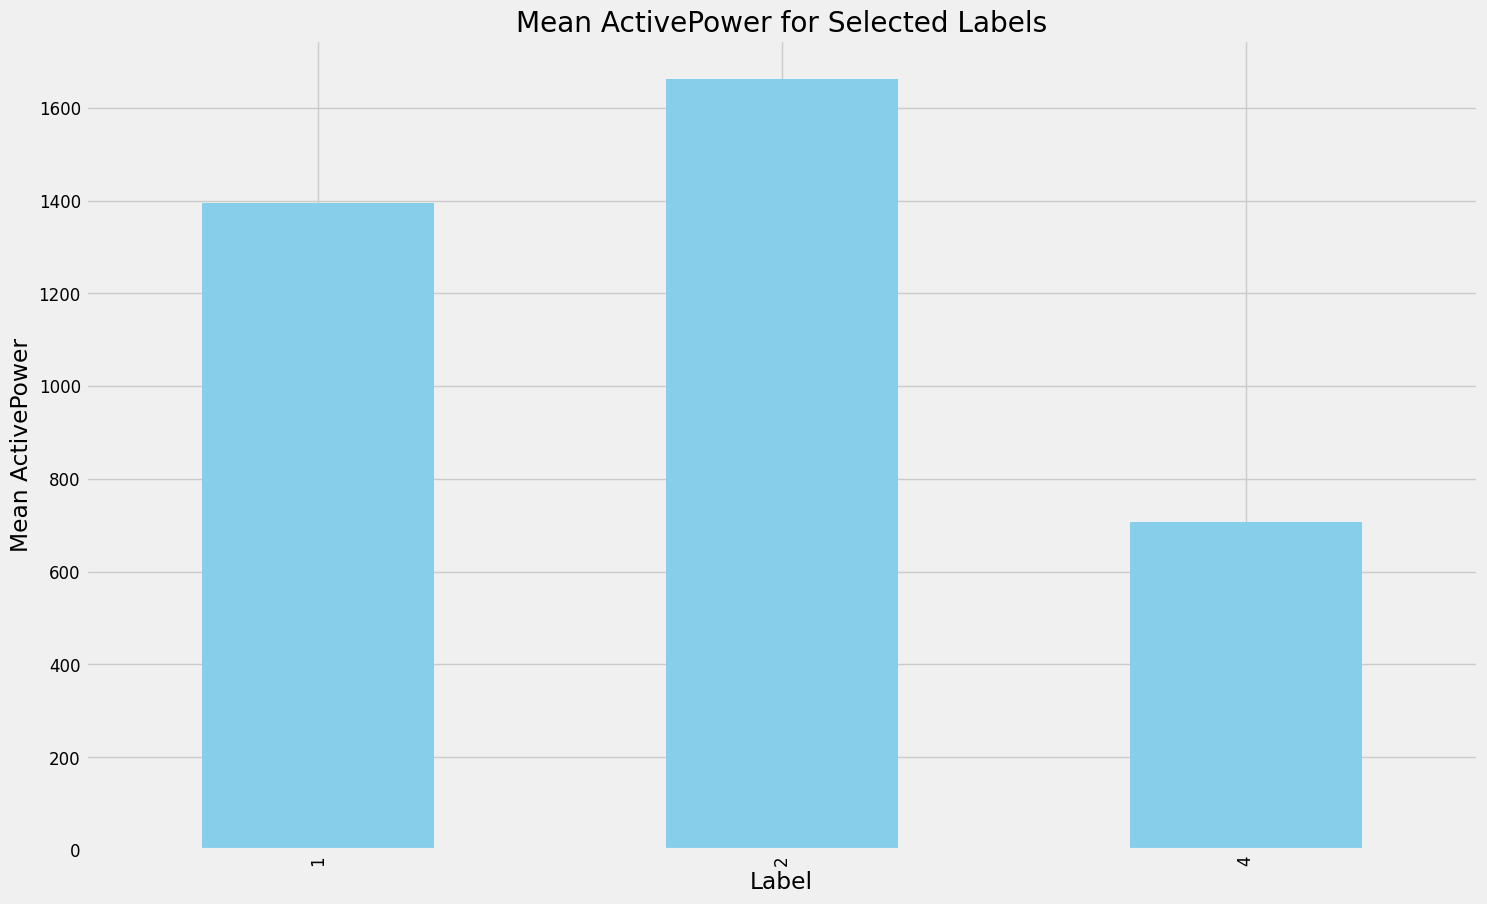

In [62]:
# Assuming your DataFrame is named df
labels_to_visualize = [1, 2, 4]

# Filter the DataFrame for the specified labels
filtered_df = y_analysis[y_analysis['label'].isin(labels_to_visualize)]

# Group by 'label' and calculate the mean of 'ActivePower'
mean_by_label = filtered_df.groupby('label')['ActivePower'].mean()

# Plot the mean values
mean_by_label.plot(kind='bar', color='skyblue')
plt.xlabel('Label')
plt.ylabel('Mean ActivePower')
plt.title('Mean ActivePower for Selected Labels')
plt.show()

In [63]:
labels_to_describe = [1, 2, 3, 4, 5, 6, 7]

# Iterate through each label and apply describe
for label in labels_to_describe:
    label_df = y_analysis[y_analysis['label'] == label]
    label_description = label_df.describe()
    print(f"Description for Label {label}:\n{label_description}\n")

Description for Label 1:
       wahing_machine  dishwasher       oven      label  ActivePower  ReactivePower  harmonic1_Real  harmonic1_Imaginary  harmonic3_Real  harmonic3_Imaginary  harmonic5_Real  harmonic5_Imaginary  harmonic7_Real  harmonic7_Imaginary    Voltage     Current  instant_power  ApparentPower  PowerFactor        THD  HarmonicDistortionIndex  Power Fluctuations  Resistance
count      6965.00000  6965.00000 6965.00000 6965.00000   6965.00000     6965.00000      6965.00000           6965.00000      6965.00000           6965.00000      6965.00000           6965.00000      6965.00000           6965.00000 6965.00000  6965.00000     6965.00000     6965.00000   6965.00000 6965.00000               6965.00000          6965.00000  6965.00000
mean          0.00000     0.00000    1.00000    1.00000   1393.86322      155.65915      -265.06698          -6568.78683        62.12751           -146.81866       -11.23378            -34.09282       -12.80956            -16.16388  233.69124 

In [64]:
y_analysis.head()

,wahing_machine,dishwasher,oven,label,label_str,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,0,0,0,0,AO,66.24720,66.88061,14.60000,-301.00000,16.30000,-54.90000,-15.90000,-21.90000,-9.30000,-12.60000,236.30000,280.40000,4430.65331,94.13664,0.70373,4.65434,446.50000,0.00000,0.84272
2023-01-01 00:00:10,0,0,0,0,AO,66.16030,66.94031,14.60000,-301.20000,16.20000,-55.00000,-15.80000,-22.30000,-8.30000,-12.30000,236.00000,280.40000,4428.79116,94.11796,0.70295,4.66333,445.70000,-0.00869,0.84165
2023-01-01 00:00:20,0,0,0,0,AO,66.07000,66.11611,14.60000,-301.10000,16.50000,-54.90000,-15.30000,-22.20000,-4.40000,-12.90000,236.00000,280.00000,4368.29155,93.46970,0.70686,4.66686,441.90000,-0.00903,0.84286
2023-01-01 00:00:30,0,0,0,0,AO,66.21290,66.86121,12.50000,-301.50000,15.80000,-55.60000,-15.80000,-22.20000,-6.10000,-13.30000,236.00000,280.60000,4427.07478,94.09872,0.70365,4.66371,442.80000,0.01429,0.84105
2023-01-01 00:00:40,0,0,0,0,AO,66.53610,67.26651,10.80000,-302.50000,15.30000,-55.60000,-16.60000,-21.70000,-10.80000,-14.20000,236.00000,282.00000,4475.65140,94.61414,0.70324,4.65702,447.50000,0.03232,0.83688


In [65]:
y_analysis.dtypes

wahing_machine               int64
dishwasher                   int64
oven                         int64
label                        int64
label_str                   object
ActivePower                float64
ReactivePower              float64
harmonic1_Real             float64
harmonic1_Imaginary        float64
harmonic3_Real             float64
harmonic3_Imaginary        float64
harmonic5_Real             float64
harmonic5_Imaginary        float64
harmonic7_Real             float64
harmonic7_Imaginary        float64
Voltage                    float64
Current                    float64
instant_power              float64
ApparentPower              float64
PowerFactor                float64
THD                        float64
HarmonicDistortionIndex    float64
Power Fluctuations         float64
Resistance                 float64
dtype: object

In [66]:
y = Y['label']


In [67]:
df.head()

,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-01-01 00:00:00,236.30000,280.40000,66.24720,66.88061,14.60000,-301.00000,16.30000,-54.90000,-15.90000,-21.90000,-9.30000,-12.60000,0.00000,0.00000,0.00000,0.30000,3.33333,0.96609,786250.00000,66.56100,68.34231,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-21.00000,-3.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:10,236.00000,280.40000,66.16030,66.94031,14.60000,-301.20000,16.20000,-55.00000,-15.80000,-22.30000,-8.30000,-12.30000,0.00000,0.00000,0.00000,0.30000,3.33333,1.34990,786258.00000,66.75600,68.37631,283.00000,17.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-2.00000,-8.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:20,236.00000,280.00000,66.07000,66.11611,14.60000,-301.10000,16.50000,-54.90000,-15.30000,-22.20000,-4.40000,-12.90000,0.00000,0.00000,0.00000,0.00000,inf,3.01846,784082.00000,67.25400,67.78731,285.00000,17.00000,-295.00000,17.00000,-53.00000,-15.00000,-22.00000,-2.00000,-8.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:30,236.00000,280.60000,66.21290,66.86121,12.50000,-301.50000,15.80000,-55.60000,-15.80000,-22.20000,-6.10000,-13.30000,0.00000,0.00000,0.00000,0.10000,10.00000,2.27058,787410.00000,66.78700,67.85331,283.00000,15.00000,-297.00000,16.00000,-54.00000,-15.00000,-21.00000,-2.00000,-8.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:40,236.00000,282.00000,66.53610,67.26651,10.80000,-302.50000,15.30000,-55.60000,-16.60000,-21.70000,-10.80000,-14.20000,0.00000,0.00000,0.00000,0.10000,10.00000,3.01846,795322.00000,67.72200,68.42131,287.00000,14.00000,-299.00000,16.00000,-54.00000,-16.00000,-19.00000,-6.00000,-6.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1


In [68]:
x_analysis = pd.concat([x_analysis, df['maxActPower'], df['maxReactPower'], df['maxCurrent'], df['maxHarmonic1_Real'], df['maxHarmonic1_Imaginary'], df['maxHarmonic3_Real'], df['maxHarmonic3_Imaginary'], df['maxHarmonic5_Real'], df['maxHarmonic5_Imaginary'], df['maxHarmonic7_Real'], df['maxHarmonic7_Imaginary'], df['dayofweek'], df['dayofyear'], df['month'], df['hour'], df['weekday'], df['weekofyear'], df['dayofmonth'], df['season'], df['Dominant_Frequency'], df['Std_Current'], df['Total_Energy']], axis=1)

In [69]:
x_analysis.head()

,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,month,hour,weekday,weekofyear,dayofmonth,season,Dominant_Frequency,Std_Current,Total_Energy
2023-01-01 00:00:00,66.24720,66.88061,14.60000,-301.00000,16.30000,-54.90000,-15.90000,-21.90000,-9.30000,-12.60000,236.30000,280.40000,4430.65331,94.13664,0.70373,4.65434,446.50000,0.00000,0.84272,66.56100,68.34231,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-21.00000,-3.00000,-7.00000,6,1,1,0,6,0,1,1,0.30000,0.96609,786250.00000
2023-01-01 00:00:10,66.16030,66.94031,14.60000,-301.20000,16.20000,-55.00000,-15.80000,-22.30000,-8.30000,-12.30000,236.00000,280.40000,4428.79116,94.11796,0.70295,4.66333,445.70000,-0.00869,0.84165,66.75600,68.37631,283.00000,17.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-2.00000,-8.00000,6,1,1,0,6,0,1,1,0.30000,1.34990,786258.00000
2023-01-01 00:00:20,66.07000,66.11611,14.60000,-301.10000,16.50000,-54.90000,-15.30000,-22.20000,-4.40000,-12.90000,236.00000,280.00000,4368.29155,93.46970,0.70686,4.66686,441.90000,-0.00903,0.84286,67.25400,67.78731,285.00000,17.00000,-295.00000,17.00000,-53.00000,-15.00000,-22.00000,-2.00000,-8.00000,6,1,1,0,6,0,1,1,0.00000,3.01846,784082.00000
2023-01-01 00:00:30,66.21290,66.86121,12.50000,-301.50000,15.80000,-55.60000,-15.80000,-22.20000,-6.10000,-13.30000,236.00000,280.60000,4427.07478,94.09872,0.70365,4.66371,442.80000,0.01429,0.84105,66.78700,67.85331,283.00000,15.00000,-297.00000,16.00000,-54.00000,-15.00000,-21.00000,-2.00000,-8.00000,6,1,1,0,6,0,1,1,0.10000,2.27058,787410.00000
2023-01-01 00:00:40,66.53610,67.26651,10.80000,-302.50000,15.30000,-55.60000,-16.60000,-21.70000,-10.80000,-14.20000,236.00000,282.00000,4475.65140,94.61414,0.70324,4.65702,447.50000,0.03232,0.83688,67.72200,68.42131,287.00000,14.00000,-299.00000,16.00000,-54.00000,-16.00000,-19.00000,-6.00000,-6.00000,6,1,1,0,6,0,1,1,0.10000,3.01846,795322.00000


In [74]:
X = StandardScaler().fit_transform(x_analysis)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=25)


In [77]:
target_names = ['AO','OW','DW','DW_OW','WM','WM_OW','WM_DW','WM_DW_OW']


## Random Forest Algorithm

In [80]:
class_weights = {0: 0.2, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 3.0}

# Initialize RandomForestClassifier with custom class weights
clf_frst = RandomForestClassifier(n_estimators=500, class_weight=class_weights, random_state=0)

scores = cross_val_score(clf_frst, X, y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [81]:
clf_frst.fit(X_train, y_train)

In [ ]:
print(classification_report(y,clf_frst.predict(X), target_names=target_names))

              precision    recall  f1-score   support

          AO       1.00      1.00      1.00    281218
          OW       0.99      0.99      0.99      2329
          DW       1.00      0.99      0.99      6177
       DW_OW       1.00      0.98      0.99       711
          WM       1.00      0.99      0.99      9916
       WM_OW       0.98      0.98      0.98       738
       WM_DW       0.99      0.98      0.99      1293
    WM_DW_OW       1.00      0.83      0.91        18

    accuracy                           1.00    302400
   macro avg       0.99      0.97      0.98    302400
weighted avg       1.00      1.00      1.00    302400



In [ ]:
print(classification_report(y_test,clf_frst.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

          AO       1.00      1.00      1.00     84365
          OW       0.98      0.96      0.97       699
          DW       0.99      0.97      0.98      1853
       DW_OW       0.98      0.92      0.95       213
          WM       0.99      0.97      0.98      2975
       WM_OW       0.94      0.95      0.94       221
       WM_DW       0.98      0.93      0.95       388
    WM_DW_OW       1.00      0.50      0.67         6

    accuracy                           1.00     90720
   macro avg       0.98      0.90      0.93     90720
weighted avg       1.00      1.00      1.00     90720



In [ ]:
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your testing data
baseline_predictions = clf_frst.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.9974


In [ ]:
clf_frst.feature_importances_

array([0.0282, 0.0418, 0.0107, 0.0316, 0.0554, 0.0354, 0.106 , 0.0406,
       0.1226, 0.0342, 0.0023, 0.0067, 0.0628, 0.0424, 0.0058, 0.0055,
       0.0366, 0.005 , 0.007 , 0.0582, 0.0599, 0.0085, 0.0091, 0.0255,
       0.0126, 0.0326, 0.0105, 0.0233, 0.0131, 0.0231, 0.0021, 0.0037,
       0.0008, 0.0074, 0.0021, 0.0023, 0.0039, 0.0003, 0.0011, 0.0124,
       0.007 ])

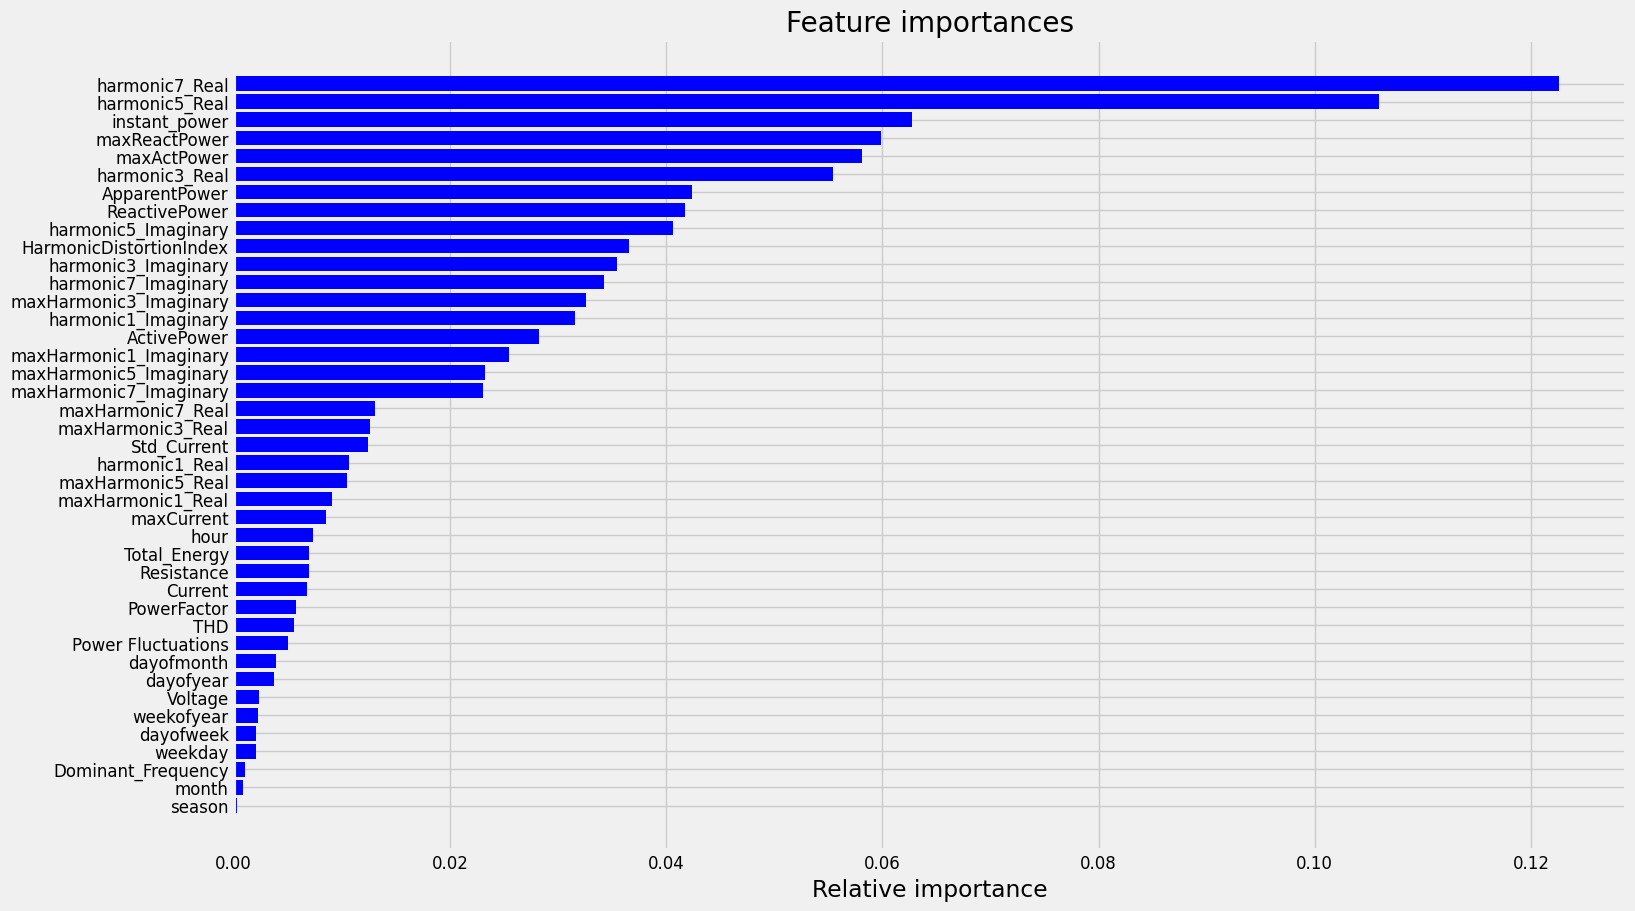

In [ ]:
# features = x_analysis.columns
features = x_analysis.columns
importances = clf_frst.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()